In [5]:
!pip install networkx
!pip install matplotlib
!pip install numpy

                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 653.6 kB/s eta 0:00:04
     ------                                   0.3/2.1 MB 4.2 MB/s eta 0:00:01
     ------------------                       1.0/2.1 MB 7.8 MB/s eta 0:00:01
     ---------------------------------        1.7/2.1 MB 10.1 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 11.0 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of individuals in the network
N = 1000

# Each individual is connected to k nearest neighbors in ring topology
k = 10

# The probability of rewiring each edge
p = 0.1

In [16]:
!pip install scipy

In [18]:
# Generate a small-world network
G = nx.watts_strogatz_graph(N, k, p)

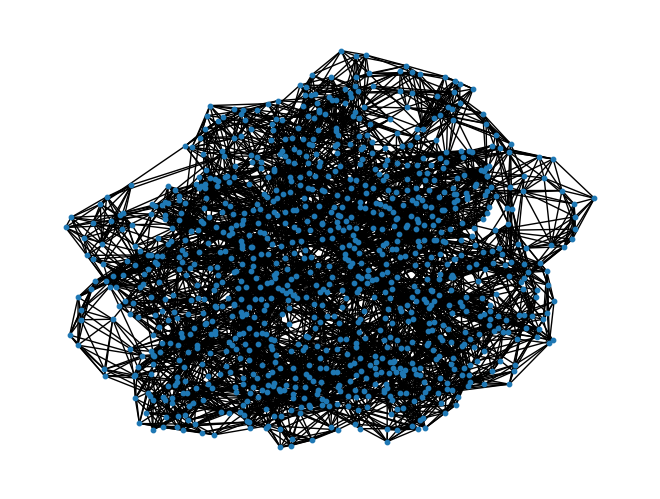

In [19]:
nx.draw(G, node_size=10)
plt.show()

In [21]:
# Probability that an individual is initially active
p_active = 0.1

# Mean and standard deviation of adoption thresholds
threshold_mean = 0.5
threshold_std = 0.1

# Parameters for influence strength and propensity to share
influence_strength_low = 0
influence_strength_high = 1
propensity_to_share_mean = 0.5
propensity_to_share_std = 0.1

# Assign each individual an initial state, adoption threshold, influence strength, and propensity to share
for node in G.nodes:
    # The initial state is active with probability p_active
    G.nodes[node]['state'] = np.random.choice(['active', 'inactive'], p=[p_active, 1-p_active])
    
    # The adoption threshold is normally distributed, but truncated between 0 and 1
    G.nodes[node]['threshold'] = min(max(np.random.normal(threshold_mean, threshold_std), 0), 1)
    
    # Influence strength is uniformly distributed
    G.nodes[node]['influence_strength'] = np.random.uniform(influence_strength_low, influence_strength_high)
    
    # Propensity to share is normally distributed, but truncated between 0 and 1
    G.nodes[node]['propensity_to_share'] = min(max(np.random.normal(propensity_to_share_mean, propensity_to_share_std), 0), 1)

In [22]:
def update_states(G):
    # Create a copy of the current states
    states = {node: data['state'] for node, data in G.nodes(data=True)}

    # Loop over each node in the graph
    for node, data in G.nodes(data=True):
        if data['state'] == 'inactive':
            # Count the proportion of active neighbors
            active_neighbors = sum(states[neighbor] == 'active' for neighbor in G.neighbors(node))
            proportion_active_neighbors = active_neighbors / len(list(G.neighbors(node)))

            # If the proportion of active neighbors is greater than or equal to the node's threshold,
            # the node becomes active
            if proportion_active_neighbors >= data['threshold']:
                G.nodes[node]['state'] = 'active'

In [23]:
for node, data in G.nodes(data=True):
    print(f"Node {node} is {data['state']}")

Node 0 is inactive
Node 1 is inactive
Node 2 is inactive
Node 3 is inactive
Node 4 is inactive
Node 5 is inactive
Node 6 is inactive
Node 7 is inactive
Node 8 is inactive
Node 9 is inactive
Node 10 is inactive
Node 11 is inactive
Node 12 is inactive
Node 13 is inactive
Node 14 is inactive
Node 15 is inactive
Node 16 is active
Node 17 is inactive
Node 18 is inactive
Node 19 is inactive
Node 20 is inactive
Node 21 is inactive
Node 22 is inactive
Node 23 is inactive
Node 24 is inactive
Node 25 is inactive
Node 26 is inactive
Node 27 is inactive
Node 28 is inactive
Node 29 is inactive
Node 30 is inactive
Node 31 is active
Node 32 is inactive
Node 33 is inactive
Node 34 is active
Node 35 is inactive
Node 36 is inactive
Node 37 is inactive
Node 38 is inactive
Node 39 is inactive
Node 40 is inactive
Node 41 is inactive
Node 42 is inactive
Node 43 is inactive
Node 44 is inactive
Node 45 is inactive
Node 46 is inactive
Node 47 is inactive
Node 48 is inactive
Node 49 is active
Node 50 is inactiv

In [24]:
# Initialize a dictionary to hold the states at each time step
states_over_time = {node: [] for node in G.nodes}

# Run the simulation for a certain number of time steps
num_steps = 10
for step in range(num_steps):
    update_states(G)
    
    # Record the state of each node at this time step
    for node, data in G.nodes(data=True):
        states_over_time[node].append(data['state'])

# Print the states of each node over time
for node, states in states_over_time.items():
    print(f"Node {node} states: {states}")

Node 0 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 1 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 2 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 3 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 4 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 5 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 6 states: ['inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive', 'inactive']
Node 7 states: ['inactive', 'inactive', 'inactiv

In [25]:
import networkx as nx
import numpy as np

# Create a network
G = nx.erdos_renyi_graph(1000, 0.1)

# Parameters
p_active = 0.1
threshold_mean = 0.5
threshold_std = 0.1
influence_strength_low = 0
influence_strength_high = 1
propensity_to_share_mean = 0.5
propensity_to_share_std = 0.1

# Assign each individual an initial state, adoption threshold, influence strength, and propensity to share
for node in G.nodes:
    # The initial state is active with probability p_active
    G.nodes[node]['state'] = np.random.choice(['active', 'inactive'], p=[p_active, 1-p_active])
    
    # The adoption threshold is normally distributed, but truncated between 0 and 1
    G.nodes[node]['threshold'] = min(max(np.random.normal(threshold_mean, threshold_std), 0), 1)
    
    # Influence strength is uniformly distributed
    G.nodes[node]['influence_strength'] = np.random.uniform(influence_strength_low, influence_strength_high)
    
    # Propensity to share is normally distributed, but truncated between 0 and 1
    G.nodes[node]['propensity_to_share'] = min(max(np.random.normal(propensity_to_share_mean, propensity_to_share_std), 0), 1)

In [26]:
# Run the simulation for a certain number of time steps
num_steps = 50
for step in range(num_steps):
    update_states(G)

In [27]:
# Initialize a list to hold the number of active nodes at each time step
num_active_over_time = []

# Run the simulation for a certain number of time steps
num_steps = 50
for step in range(num_steps):
    update_states(G)
    num_active = sum(data['state'] == 'active' for node, data in G.nodes(data=True))
    num_active_over_time.append(num_active)

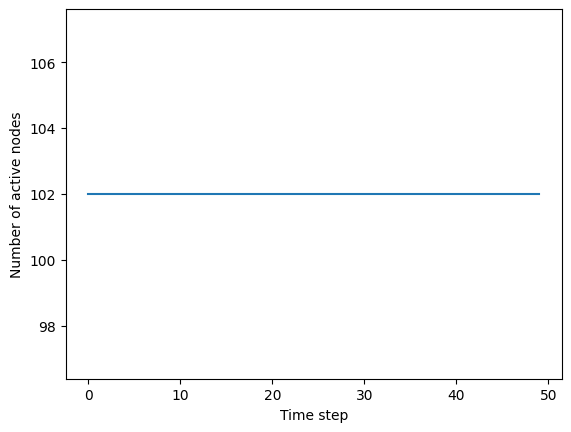

In [28]:
import matplotlib.pyplot as plt

# Plot the number of active nodes over time
plt.plot(num_active_over_time)
plt.xlabel('Time step')
plt.ylabel('Number of active nodes')
plt.show()

It must be hard for nodes to become active, let's consider a few things:

increase the initial proportion of active nodes: If the initial proportion of active nodes (p_active) is too low, it might be difficult for the viral marketing campaign to gain traction. I could increase this parameter, to 0.2 or 0.3. (20% or 30% of nodes) are initially active and can begin influencing their neighbors.

Decrease the mean adoption threshold: If the mean adoption threshold (threshold_mean) is too high, it might be difficult for inactive nodes to become active, even if they have many active neighbors. Let's maybe decrease this parameter to 0.3 or 0.4.

Increase the influence strength: If the influence strength of active nodes is too low, they may not be able to effectively influence their neighbors. You might consider increasing the lower bound of the uniform distribution from which influence strength is sampled (influence_strength_low), for example, to 0.2 or 0.3.

Integrate influence strength and propensity to share into the transition rules: Currently, the update_states function does not take into account the influence strength or propensity to share of the nodes. You might consider modifying this function so that these properties influence the likelihood of a node becoming active. For example, nodes with higher influence strength could be more likely to make their neighbors active, and nodes with higher propensity to share could be more likely to become active themselves.

Begin sensitvity testing

Vary the initial proportion of active nodes (p_active): Start with small values (like 0.1) and incrementally increase up to 1, keeping all other parameters constant. For each value, run the simulation and record the number of time steps it takes for all nodes to become 'active' or the final proportion of 'active' nodes.

In [29]:
import numpy as np
import networkx as nx

# Define your network parameters
N = 1000  # Number of nodes
p_conn = 0.1  # Probability of connection between nodes

# Parameters for the properties of nodes
threshold_mean = 0.5
threshold_std = 0.1
influence_strength_low = 0
influence_strength_high = 1
propensity_to_share_mean = 0.5
propensity_to_share_std = 0.1

# Function to setup the network
def setup_network(N, p_conn, p_active, threshold_mean, threshold_std, influence_strength_low, influence_strength_high, propensity_to_share_mean, propensity_to_share_std):
    G = nx.erdos_renyi_graph(N, p_conn)
    
    for node in G.nodes:
        G.nodes[node]['state'] = np.random.choice(['active', 'inactive'], p=[p_active, 1-p_active])
        G.nodes[node]['threshold'] = min(max(np.random.normal(threshold_mean, threshold_std), 0), 1)
        G.nodes[node]['influence_strength'] = np.random.uniform(influence_strength_low, influence_strength_high)
        G.nodes[node]['propensity_to_share'] = min(max(np.random.normal(propensity_to_share_mean, propensity_to_share_std), 0), 1)
    
    return G

# Function to update states
def update_states(G):
    # Create a copy of the current states
    states = {node: data['state'] for node, data in G.nodes(data=True)}

    # Loop over each node in the graph
    for node, data in G.nodes(data=True):
        if data['state'] == 'inactive':
            # Count the proportion of active neighbors
            active_neighbors = sum(states[neighbor] == 'active' for neighbor in G.neighbors(node))
            proportion_active_neighbors = active_neighbors / len(list(G.neighbors(node)))

            # If the proportion of active neighbors is greater than or equal to the node's threshold,
            # the node becomes active
            if proportion_active_neighbors >= data['threshold']:
                G.nodes[node]['state'] = 'active'

# Function to run the simulation
def run_simulation(G, num_steps):
    for _ in range(num_steps):
        update_states(G)

# Values for p_active to test
p_active_values = np.linspace(0.1, 1, 10)

# Run the simulations
results = []
for p_active in p_active_values:
    # Setup the network
    G = setup_network(N, p_conn, p_active, threshold_mean, threshold_std, influence_strength_low, influence_strength_high, propensity_to_share_mean, propensity_to_share_std)
    
    # Run the simulation
    num_steps = 50  # or whatever number of steps you choose
    run_simulation(G, num_steps)
    
    # Calculate the final proportion of active nodes
    final_proportion_active = sum(data['state'] == 'active' for node, data in G.nodes(data=True)) / len(G)
    results.append(final_proportion_active)

# Print or plot the results
print(results)

[0.106, 0.182, 0.307, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


When the initial proportion of 'active' nodes (p_active) is low (e.g., 0.1), only a small fraction of nodes (about 10.6%) end up becoming 'active' by the end of the simulation.

As p_active increases, the final proportion of 'active' nodes also increases. For example, when p_active is around 0.3, about 30.7% of nodes are 'active' at the end of the simulation.

Once p_active reaches a certain threshold (somewhere between 0.3 and 0.4 in this case), the behavior changes dramatically: almost all nodes end up 'active' at the end of the simulation.

So, how sensitive is the model to the initial proportion of 'active' nodes? In this case, it appears that there's a critical threshold: above this threshold, the behavior spreads rapidly throughout the network, but below this threshold, the behavior spreads more slowly and might not reach all parts of the network.